# Parse mutation data for time series, frequency plots.

In [79]:
import numpy as np
import pandas as pd
import re
UA3_100 = pd.read_table('/Users/ymseah/Documents/sic_UA3-15_breseq/annotated.gd', comment='#', names=range(50))
UA3_100.insert(0, 'generation', 100)
UA3_300 = pd.read_table('/Users/ymseah/Documents/sic_UA3.45_breseq/annotated.gd', comment='#', names=range(50))
UA3_300.insert(0, 'generation', 300)
UA3_500 = pd.read_table('/Users/ymseah/Documents/sic_UA3-76_breseq/annotated.gd', comment='#', names=range(50))
UA3_500.insert(0, 'generation', 500)
UA3_780 = pd.read_table('/Users/ymseah/Documents/sic_UA3.118_breseq/annotated.gd', comment='#', names=range(50))
UA3_780.insert(0, 'generation', 780)
UA3_1000 = pd.read_table('/Users/ymseah/Documents/sic_UA3_S2_L001_breseq/output/evidence/annotated.gd', comment='#', names=range(50))
UA3_1000.insert(0, 'generation', 1000)

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
UA3_df  = pd.concat([UA3_100, UA3_300, UA3_500, UA3_780, UA3_1000], ignore_index=True)
UA3_df.insert(0, 'line', 'UA3')
UA3_df.insert(2, 'frequency', 0.0)
UA3_df.insert(3, 'gene_product', '')
UA3_df.insert(4, 'reject', '')

In [83]:
for row in UA3_df.itertuples():
    #check each column
    col_index = 6
    while col_index < 50:
        #1. polymorphism frequencies
        if re.match('frequency=', str(UA3_df.loc[row[0], col_index])):
            UA3_df.loc[row[0], 'frequency'] = re.sub('frequency=', '', str(UA3_df.loc[row[0], col_index]))
        #2. gene products
        elif re.match('gene_product=', str(UA3_df.loc[row[0], col_index])):
            UA3_df.loc[row[0], 'gene_product'] = re.sub('gene_product=', '', str(UA3_df.loc[row[0], col_index]))
        #3. polymorphism rejection reasons
        elif re.match('reject=', str(UA3_df.loc[row[0], col_index])):
            UA3_df.loc[row[0], 'reject'] = re.sub('reject=', '', str(UA3_df.loc[row[0], col_index]))
        col_index += 1
    #set frequencies type to float
    if re.match('1|2|3|4|5|6|7|8|9', str(UA3_df.loc[row[0], 'frequency'])):
        UA3_df.loc[row[0], 'frequency'] = float(UA3_df.loc[row[0], 'frequency'])
    else:
        UA3_df.loc[row[0], 'frequency'] = 0.0
    #set positions (col 4) type to int
    UA3_df.loc[row[0], 4] = int(UA3_df.loc[row[0], 4])

In [101]:
UA3_df.head(10)

,line,generation,frequency,gene_product,reject,0,1,2,3,4,...,40,41,42,43,44,45,46,47,48,49
0,UA3,100,1,hypothetical protein/hypothetical protein,,INS,1,109,NC_002937,42867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UA3,100,1,oligopeptide/dipeptide ABC transporter peripla...,,INS,2,110,NC_002937,211389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UA3,100,1,"ISDvu4, transposase, truncation/glyceraldehyde...",,MOB,3,"1494,1495",NC_002937,629936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UA3,100,1,methyl-accepting chemotaxis protein/precorrin-...,,SNP,4,112,NC_002937,716874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UA3,100,1,histidinol dehydrogenase/hypothetical protein,,DEL,5,113,NC_002937,882512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,UA3,100,1,hypothetical protein/hypothetical protein,,INS,6,116,NC_002937,1313341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,UA3,100,1,geranylgeranyl diphosphate synthase,,SNP,7,117,NC_002937,1426830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,UA3,100,1,hypothetical protein,,SNP,8,118,NC_002937,1773256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,UA3,100,1,hypothetical protein,,DEL,9,119,NC_002937,1773345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,UA3,100,1,lipoprotein,,SNP,10,120,NC_002937,1913197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
DvH_UA3_nonzero = UA3_df[(UA3_df[3] == 'NC_002937') & (UA3_df['frequency'] > 0)]
DvHplasmid_UA3_nonzero = UA3_df[(UA3_df[3] == 'NC_005863') & (UA3_df['frequency'] > 0)]
MmS2_UA3_nonzero = UA3_df[(UA3_df[3] == 'NC_005791') & (UA3_df['frequency'] > 0)]

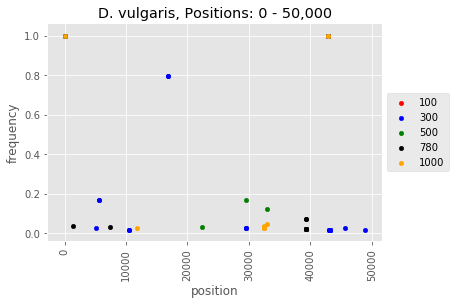

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#zoom in on DvH first 50,000 bases

DvH_UA3_50k = DvH_UA3_nonzero.loc[DvH_UA3_nonzero['position'] <= 50000]
DvH_UA3_50kgen = DvH_UA3_50k.groupby('generation')
colors = {100: 'red', 300: 'blue', 500: 'green', 780: 'black', 1000: 'orange'}

fig, ax = plt.subplots()
for generation, mut in DvH_UA3_50kgen:
    mut.plot.scatter(x = 'position', y = 'frequency', rot=90, ax = ax, label = generation, color = colors[generation])
    plt.title('D. vulgaris, Positions: 0 - 50,000')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

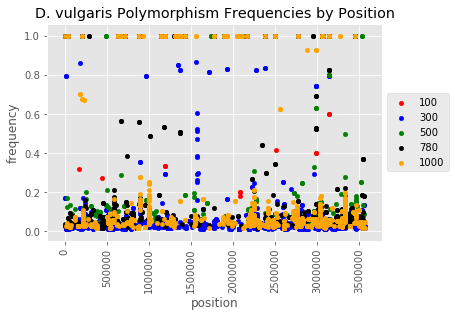

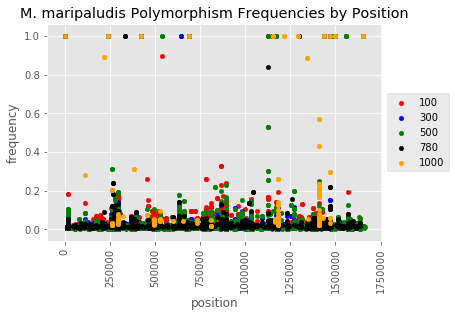

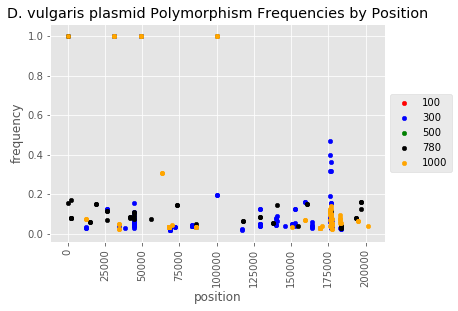

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

DvH_UA3_gen = DvH_UA3_nonzero.groupby('generation')
DvHplasmid_UA3_gen = DvHplasmid_UA3_nonzero.groupby('generation')
MmS2_UA3_gen = MmS2_UA3_nonzero.groupby('generation')
colors = {100: 'red', 300: 'blue', 500: 'green', 780: 'black', 1000: 'orange'}

fig, ax = plt.subplots()
for generation, mut in DvH_UA3_gen:
    mut.plot.scatter(x = 'position', y = 'frequency', rot=90, ax = ax, label = generation, color = colors[generation])
plt.title('D. vulgaris Polymorphism Frequencies by Position')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax = plt.subplots()
for generation, mut in MmS2_UA3_gen:
    mut.plot.scatter(x = 'position', y = 'frequency', rot=90, ax = ax, label = generation, color = colors[generation])
plt.title('M. maripaludis Polymorphism Frequencies by Position')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

fig, ax = plt.subplots()
for generation, mut in DvHplasmid_UA3_gen:
    mut.plot.scatter(x = 'position', y = 'frequency', rot=90, ax = ax, label = generation, color = colors[generation])
plt.title('D. vulgaris plasmid Polymorphism Frequencies by Position')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [ ]:
#zoom in on specific genome locations

DvH_UA3_pos = DvH_UA3.groupby(['position', 'generation'])
DvH_UA3_pos['frequency']

## Problems & Solutions
### 1. Inconsistent number of columns in gdiff output files raises error with pandas read_table() function.
Solution 1: Table headers need to be specified with read_table(names=[]) to assign NaN to "missing" column values.

Solution 2: Use index.html output instead, parse into data structure acceptable by pandas.

In [263]:
#This is Solution 2
import re
from bs4 import BeautifulSoup
soup = BeautifulSoup(open('/Users/ymseah/Documents/sic_UA3_S2_L001_breseq/output/index.html'), 'html5lib')

#EXAMPLE ROW
#<tr class="normal_table_row">
#<td align="center"><a href="evidence/INS_1.html">RA</a></td><!-- Evidence -->
#<td align="center">NC_002937</td><!-- Seq_Id -->
#<td align="right">42,867</td><!-- Position -->
#<td align="center">+G</td><!-- Cell Mutation -->
#<td align="right">100%</td>
#<td align="center">intergenic (‑125/+57)</td>
#<td align="center"><i>DVU0036</i> ← / ← <i>DVU0037</i></td>
#<td align="left">hypothetical protein/hypothetical protein</td>
#</tr>

#get each consensus mode row 
tr_consensus = soup('tr', 'normal_table_row')
cons_ref_genome = [tr.find_all_next('td')[1].text for tr in tr_consensus]
cons_mutation_pos = [tr.find_all_next('td')[2].text for tr in tr_consensus]
cons_mutation = [tr.find_all_next('td')[3].text for tr in tr_consensus]
cons_freq = [tr.find_all_next('td')[4].text for tr in tr_consensus]

#get each polymorphism mode row
tr_polymorphism = soup('tr', 'polymorphism_table_row')
polym_ref_genome = [tr.find_all_next('td')[1].text for tr in tr_polymorphism]
polym_mutation_pos = [tr.find_all_next('td')[2].text for tr in tr_polymorphism]
polym_mutation = [tr.find_all_next('td')[3].text for tr in tr_polymorphism]
polym_freq = [tr.find_all_next('td')[4].text for tr in tr_polymorphism]

ref_genome = cons_ref_genome + polym_ref_genome

mutation_pos = cons_mutation_pos + polym_mutation_pos
clean_mutation_pos = []
i = 0
while i < len(mutation_pos):
    clean_position = re.sub(',', '', mutation_pos[i])
    clean_mutation_pos.append(int(clean_position))
    i += 1

freq = cons_freq + polym_freq
clean_freqs = []
i = 0
while i < len(freq):
    clean_freq = re.sub('%', '', freq[i])
    clean_freqs.append(float(clean_freq))
    i += 1

mutation_freq_dict = {'genome': ref_genome, 'position': clean_mutation_pos, 'frequency': clean_freqs}

In [264]:
import numpy as np
import pandas as pd
df = pd.DataFrame(mutation_freq_dict)
DvH = df.loc[df['genome'] == 'NC_002937']
#DvHplasmid = df.loc[df['genome'] == 'NC_005863']
MmS2 = df.loc[df['genome'] == 'NC_005791']

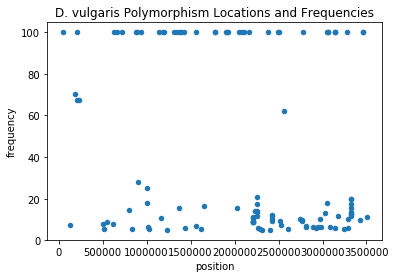

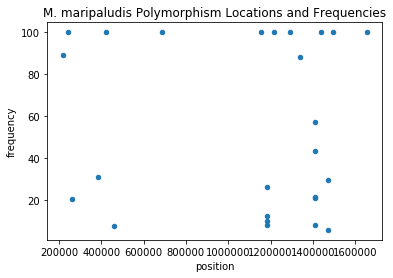

In [265]:
import matplotlib.pyplot as plt
DvH.plot.scatter(x = 'position', y = 'frequency')
plt.title('D. vulgaris Polymorphism Locations and Frequencies')
plt.show()
MmS2.plot.scatter(x = 'position', y = 'frequency')
plt.title('M. maripaludis Polymorphism Locations and Frequencies')
plt.show()

## 2. Polymorphism frequencies, etc. are not consistently in the same column.

Solution: Use regex matching across rows.

In [ ]:
'''
for row in UA3_100.itertuples():
    #check each column for polymorphism frequencies
    i = 6
    while i < 50:
        if re.match('frequency=', str(UA3_100.loc[row[0], i])):
            UA3_100.loc[row[0], 'frequency'] = re.sub('frequency=', '', str(UA3_100.loc[row[0], i]))
        i += 1
    if re.match('1|2|3|4|5|6|7|8|9', str(UA3_100.loc[row[0], 'frequency'])):
        UA3_100.loc[row[0], 'frequency'] = float(UA3_100.loc[row[0], 'frequency'])
    else:
        UA3_100.loc[row[0], 'frequency'] = 0.0
    #change position (col4) type to int for plotting
    UA3_100.loc[row[0], 4] = int(UA3_100.loc[row[0], 4])
UA3_100.rename(columns = {4:'position'}, inplace=True)
'''